In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="JJyrYsOnpzZODYXKuMQOPS60e",
    project_name="movie-recommendation",
    workspace="kachi-k",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kachi-k/movie-recommendation/fa6dec84d8924a66918c81c3dbe9c5fa



In [ ]:
pip install comet_ml

In [28]:
import pandas as pd
import numpy as np
#imports to make plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# Import KMeans model
from sklearn.cluster import KMeans
# Import time to measure algorithm runtime 
from time import time
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth',200)#displays more row lenght

# Hide for now

In [ ]:
# uploading files from google drive
# !gdown --id 10b2JB7NtPCzAVuGow3rkATs5CMGSjtf8

In [ ]:
genome_scores = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/genome_scores.csv').dropna()
genome_scores.isna().sum().sum()

0

In [ ]:
genome_tags = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/genome_tags.csv').dropna()
genome_tags.isna().sum().sum()

0

In [ ]:
imdb_data = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/imdb_data.csv').dropna()
imdb_data.isna().sum().sum()

0

In [ ]:
links = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/links.csv').dropna()
links.isna().sum().sum()

0

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/movies.csv').dropna()
movies.isna().sum().sum()

0

In [ ]:
tags = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/tags.csv').dropna()
tags.isna().sum().sum()

0

In [ ]:
g_scores_tags = pd.merge(genome_scores, genome_tags , on='tagId', how='inner')
g_scores_tags.head(100)

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,2,1,0.04125,007
2,3,1,0.04675,007
3,4,1,0.03425,007
4,5,1,0.04300,007
...,...,...,...,...
95,98,1,0.02100,007
96,99,1,0.02575,007
97,100,1,0.03425,007
98,101,1,0.02375,007


# Part of Work that was used


In [29]:
train = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/train.csv').drop('timestamp', axis = 1)
train.head()

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [30]:
train.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
# train['user_movie'] = train['userId'].astype(str) + '_' + train['movieId'].astype(str)
# train.head()

In [31]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

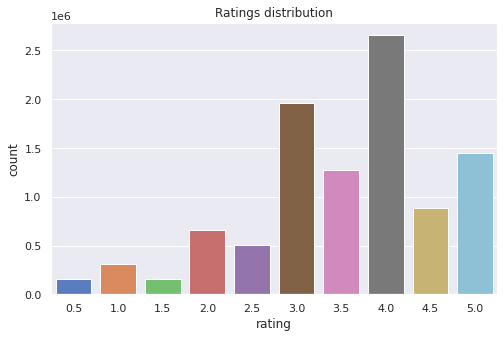

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(train["rating"])
plt.title('Ratings distribution')
plt.show()

In [ ]:
count_rating_per_user= train.groupby('userId')['rating'].value_counts()
count_rating_per_user.plot(kind = 'bar')
# fig = plt.figure(figsize = (10, 5))
# # creating the bar plot
# plt.bar( users, count_ratings, color ='maroon',width = 0.4)
plt.show()


In [33]:
scaler = MinMaxScaler()

train_scaled = pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/train.csv').drop('timestamp', axis = 1)
train_scaled = scaler.fit_transform(train_scaled)

In [34]:
train_scaled

array([[3.17583364e-02, 2.75699192e-01, 7.77777778e-01],
       [6.54251261e-01, 1.91232012e-05, 8.88888889e-01],
       [9.03094623e-01, 2.60936081e-02, 1.00000000e+00],
       ...,
       [9.52417866e-01, 2.71458622e-01, 7.77777778e-01],
       [5.27894672e-01, 1.55854090e-03, 7.77777778e-01],
       [8.57979574e-01, 4.81904671e-03, 7.77777778e-01]])

Text(0, 0.5, 'Cumulative explained variance')

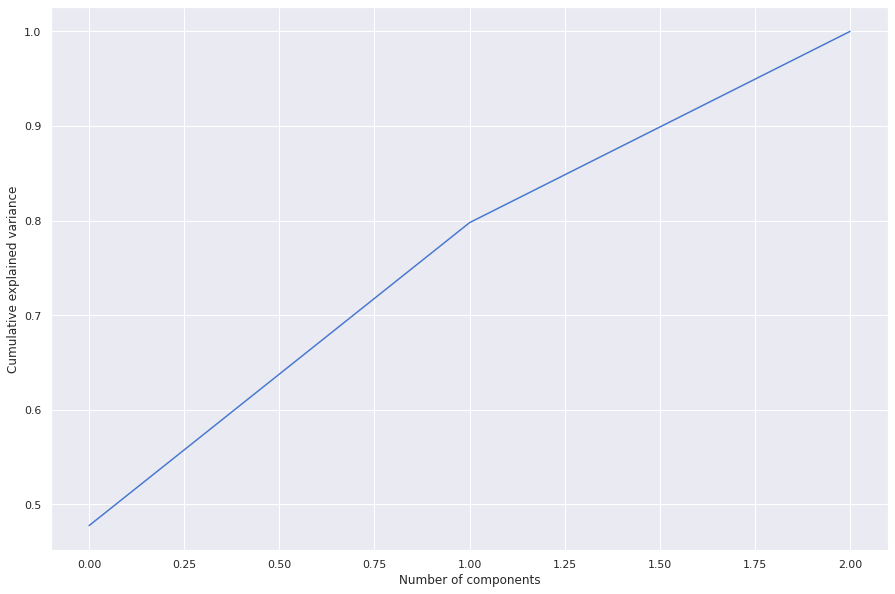

In [37]:
pca = PCA()
prin_comp = pca.fit_transform(train_scaled)
pca_df = pd.DataFrame(data = prin_comp)
# # define PCA object
# pca = PCA()

# # fit the PCA model to our data and apply the dimensionality reduction 
# prin_comp = pca.fit_transform(us_df_scaled[features])

# create a dataframe containing the principal components
# pca_df = pd.DataFrame(data = prin_comp)

# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [38]:
pca_ = PCA(.85)
pca_.fit_transform(train_scaled)
print(round(pca_.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_.n_components_,
      "components.")

100.0 % of variance explained by 3 components.


In [39]:
pca.explained_variance_ratio_[:3]

array([0.47743713, 0.32034194, 0.20222093])

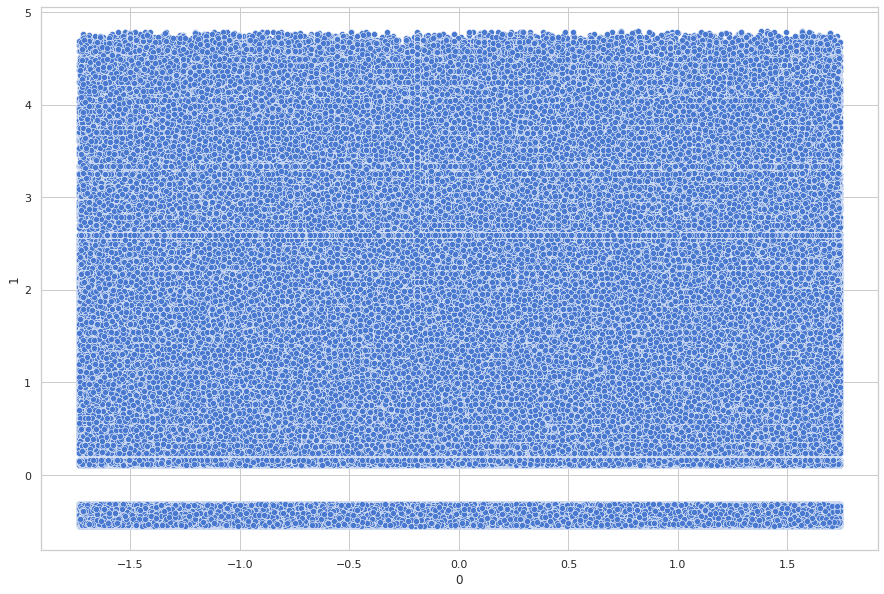

In [ ]:
train_df = pd.DataFrame(data = train_scaled)

ax = sns.scatterplot(x=train_df[0], y=train_df[1],
                     palette='RdBu',
                     data=train_df,
                     legend=False)
plt.show()

In [40]:
train_scaled = scaler.inverse_transform(train_scaled)

In [45]:
# exclude non-features from data
train_data = train_scaled

# set aside response variable (Unscaled!)
train_response = train["rating"]

# drop response variable
train_data = np.delete(train_data, 2, 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_response, test_size=0.2)

In [47]:
# create PCA object with n_components set to 13
pca_reg = PCA(n_components=2)

# fit the PCA model to our data and apply the dimensionality reduction 
X_train = pca_reg.fit_transform(X_train)

# confirm the number of components
pca_reg.n_components_

2

In [48]:
pca_reg.explained_variance_ratio_.sum()

1.0

In [49]:
X_test = pca_reg.transform(X_test)

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
beta_0 = float(lm.intercept_)

In [53]:
lm_pred = lm.predict(X_test)


In [54]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm_pred)))

RMSE: 1.060875518579083


In [55]:
test= pd.read_csv('/content/drive/MyDrive/EDSA-movie-recommendation-PREDICT-2022/test.csv')
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [56]:
X_test_orig = pca.inverse_transform(pca.fit_transform(X_test))

In [57]:
prediction = lm.predict(test)

In [58]:
test['sub_Id'] = test['userId'].astype(str) + '_' + test['movieId'].astype(str)
test.head()

,userId,movieId,sub_Id
0,1,2011,1_2011
1,1,4144,1_4144
2,1,5767,1_5767
3,1,6711,1_6711
4,1,7318,1_7318


In [59]:
submission = pd.DataFrame({'Id': test['sub_Id'], 'rating': prediction})
submission.head()

,Id,rating
0,1_2011,3.532968
1,1_4144,3.532459
2,1_5767,3.532073
3,1_6711,3.531848
4,1_7318,3.531703


In [60]:
submission.to_csv('LinearRegression_Movie_recommender.csv', index=False , header = 1)